# Merenje zakrivljnosti


Radijus zakrivljnosti([tutorial]("https://www.intmath.com/applications-differentiation/8-radius-curvature.php")) u nekoj tacki $x$ funkcije $f(x)$ je dato sa formulom:<br>$R_{curve}=\frac{[1+(\frac{dx}{dy})^2]^{\frac{3}{2}}}{|\frac{d^x}{dy^2}|}$ <br> posto znao da je nasa funkcija polinom drugog stepena tada imamo da je: <br>$f'(x)=\frac{dx}{dy}=2Ay+B$<br>$f''(x)=\frac{d^x}{dy^2}=2A$ 
pa formu zakrivljnosti je:<br>$R_{curve}=\frac{(1+(2Ay+B)^2)^\frac{3}{2}}{|2A|}$

<img src="img/radiusCurve.jpg">

In [2]:

import numpy as np
import matplotlib.pyplot as plt

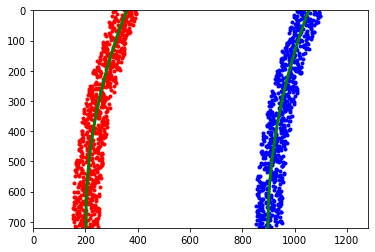

In [3]:

# Generisemo vestačke podatke
ploty = np.linspace(0, 719, num=720)
quad_coeff = 3e-4 # proizvoljan kvadratni koeficijent

# Za svaki y generišemo random x poziciju sa +/-50 pix
# koristimo za početak leve i desne linije pozicije (x=200 za levu, x=900 za desnu)
leftx = np.array([200 + (y**2)*quad_coeff + np.random.randint(-50, high=51)  for y in ploty])
rightx = np.array([900 + (y**2)*quad_coeff + np.random.randint(-50, high=51) for y in ploty])

leftx = leftx[::-1]  # Obrtanje da bi se poklopilo sa y kordinatom
rightx = rightx[::-1]  

# fitujemo polinom drugog reda nad pokselima da bismo kreirali linije
left_fit = np.polyfit(ploty, leftx, 2)
# Kreiranje polinomne funkcije
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
# Kreiranje polinomne funkcije
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# vizualizacija podataka
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [4]:
def generate_data():
    '''
    Generates fake data to use for calculating lane curvature.
    
    '''
    # Setovanje seeda
    np.random.seed(0)
    # Generisanje vestačkih podataka
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quad_coeff = 3e-4 
   # Za svaki y generisemo random x poziciju sa +/-50 pix
# koristimo za početak leve i desne linije pozicije (x=200 za levu, x=900 za desnu)
    leftx = np.array([200 + (y**2)*quad_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*quad_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  
    rightx = rightx[::-1]  


   # fitujemo polinom drugog reda nad pokselima da bimo kreirali linije
    left_fit = np.polyfit(ploty, leftx, 2)
    right_fit = np.polyfit(ploty, rightx, 2)
    
    return ploty, left_fit, right_fit

    
def measure_curvature_pixels():
    '''
    Calculates the curvature of polynomial in pixcel space
    '''
    # generisanje podataka pomocu generate_data()
    ploty, left_fit, right_fit = generate_data()
    #print(f"left fit{left_fit}")
    
    
    # definišimo vrednost y gde želimo da merimo zakrivljnost, koristimo max jer tako posmatramo zakrivljenost 
    # na samom dnu slike što bi bilo ekvivalentno sa haubom auta
    y_eval = np.max(ploty) 
    
    # Formula za radijus #
    left_curverad =  np.round(np.power(1+(2*left_fit[0]*y_eval+left_fit[1])**2,3/2)/ np.abs(2*left_fit[0]),3) ## Implement the calculation of the left line here
    right_curverad = np.round(np.power(1+(2*right_fit[0]*y_eval+right_fit[1])**2,3/2)/ np.abs(2*right_fit[0]),3)  ## Implement the calculation of the right line here
    
    return left_curverad, right_curverad


# Kalkulacija radijusa 
left_curverad, right_curverad = measure_curvature_pixels()

print(left_curverad, right_curverad)


1625.06 1976.297


Odradili smo zakrivljnost ali ona je bila izračunata u prostoru piksela, sto nije isto kao u realnom svetu.
Zato možemo ukljčiti merenje duzinu deonice trake je zahvatila nasa perspektivna transforamcija sa nasim bird eye perspektivom. Možemo ovo odratiti merenjem trake na putu ali to je trenutno nezamislivo pa pretpostavljamo da je traka oko 30m duzine i 3.7m sirine na svakom frejmu. Posto naša slika kamere ima 720 piksela u y pravu(perspektivna transormisana slika) i grubo oko 700 piksela u x pravu. Pa zato koristimo deljenje 

    ym_per_pix = 30/720 # metara po pikselu u y dimenziji
    xm_per_pix = 3.7/700 # metara po pikselu u y dimenziji

In [5]:


def generate_data(ym_per_pix, xm_per_pix):

    '''
    Generates fake data to use for calculating lane curvature.
    
    '''
    # Setovanje seeda
    np.random.seed(0)
    # Generisanje vestackih podataka
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quad_coeff = 3e-4 
   # Za svaki y generisemo random x poziciju sa +/-50 pix
    # koristimo za pocetak leve i desne linije pozicije (x=200 za levu, x=900 za desnu)
    leftx = np.array([200 + (y**2)*quad_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*quad_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  
    rightx = rightx[::-1]  


   # fitujemo polinom drugog reda nad pokselima da bimo kreirali linije
    # uz dodatno mnozenje parametrima prelaska iz pixel prostora u "real world"
    left_fit_rw = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_rw = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    return ploty, left_fit_rw, right_fit_rw
    
def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Definisemo prelazak u x i y iz piksel prostora u metre

    ym_per_pix = 30/720 # metara po pikselu u y dimenziji
    xm_per_pix = 3.7/700 # metara po pikselu u y dimenziji
    
    # generisanje podataka pomocu generate_data()
    ploty, left_fit_rw, right_fit_rw = generate_data(ym_per_pix, xm_per_pix)
    
    # definisimo vrenost y gde zelimo da merimo zakrivljnost, koristimo max jer tako posmatramo zakrivljenost 
    # na samom dnu slike sto bi bilo ekvivalentno sa haubom auta
    y_eval = np.max(ploty)
    
    #  Formula za radijus 
    left_curverad = ((1 + (2*left_fit_rw[0]*y_eval*ym_per_pix + left_fit_rw[1])**2)**1.5) / np.absolute(2*left_fit_rw[0])
    right_curverad = ((1 + (2*right_fit_rw[0]*y_eval*ym_per_pix + right_fit_rw[1])**2)**1.5) / np.absolute(2*right_fit_rw[0])
    
    return left_curverad, right_curverad



left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')


533.7525889210889 m 648.157485143393 m


dodatni mateijal: http://onlinemanuals.txdot.gov/txdotmanuals/rdw/horizontal_alignment.htm#i1621441